In [1]:
#!pip install torch torchvision einops matplotlib numpy

In [2]:
%matplotlib inline

In [3]:
import torch

In [4]:
import torchvision

In [5]:
from torchvision import transforms

In [6]:
from torch.utils.data import DataLoader, Subset

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

LOADING THE MNIST DATASET

In [9]:
#Defining trasnformation to convert images to tensors
transform = transforms.Compose([transforms.ToTensor()])

In [10]:
#Downloading and loading the MNIST dataset
mnist_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)

In [11]:
#Create a subset of 1000 random samples
subset_indices=torch.randperm(len(mnist_dataset))[:1000]
mnist_subset=Subset(mnist_dataset, subset_indices)

POTTING A HISTOGRAM OF CLASSES

In [12]:
#Extract labels from the subset
labels = [mnist_subset[i][1] for i in range (len(mnist_subset))]

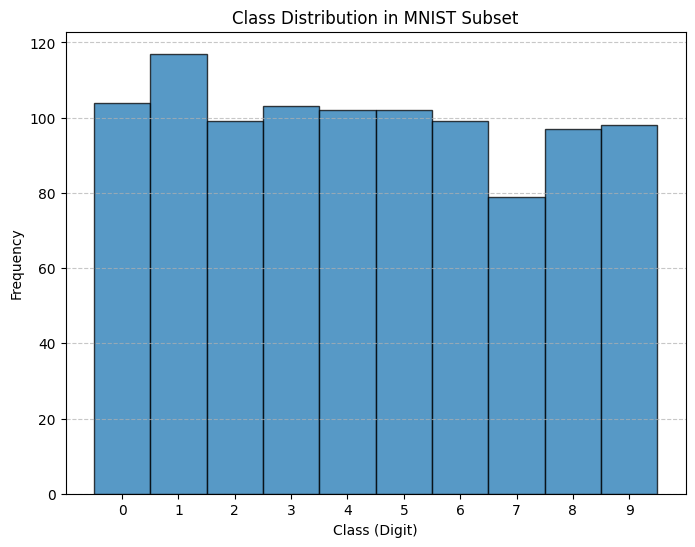

In [13]:
#Plot histogram
plt.figure(figsize=(8,6))
plt.hist(labels,bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.75)
plt.xticks(range(10)) #set x-axis labels to 0-9
plt.xlabel("Class (Digit)")
plt.ylabel("Frequency")
plt.title("Class Distribution in MNIST Subset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Histogram of classess in subset of MNIST.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
plt.savefig("Histogram of classes in subset of MNIST.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

BATCH THE MNIST DATA USING einops

In [15]:
from einops import rearrange

In [16]:
#Convert images to a tensor batch of shape [1000, 28, 28]
mnist_images = torch.stack([mnist_subset[1][0] for i in range (len(mnist_subset))]) #Shape: [1000, 1, 28, 28]

In [17]:
#Reshape into batches of 25
batch_size = 25
num_batches = len(mnist_subset)//batch_size #should be 40 batches (1000/25)

In [18]:
#Reshape using einops
mnist_batches = rearrange(mnist_images, "(b s) c h w -> b s c h w", b=num_batches, s=batch_size)

In [19]:
#Verify shape
print("New Shape:", mnist_batches.shape) #Should output: [40, 25, 1, 28, 28]

New Shape: torch.Size([40, 25, 1, 28, 28])


PLOT AN MNIST IMAGE IN 3D

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Select a random image
idx = torch.randint(0, len(mnist_subset), (1,)).item()
image, label = mnist_subset[idx]
image = image.squeeze(0).numpy() #Remove channel dimesntion

In [22]:
#Create x, y, grid
X, Y = np.meshgrid(np.arange(28), np.arange(28))

In [23]:
Z = image.T

In [24]:
#Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection = '3d')

In [25]:
#Plot surface
#ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor='none')
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=Z.flatten(), cmap="viridis", marker='o')

In [26]:
#Labels
ax.set_xlabel("X (Pixel)")
ax.set_ylabel("Y (Pixel)")
ax.set_zlabel("Pixel Intensity")
ax.set_title(f"3D Visualization of MNIST Digit '{label}'")
plt.savefig("3D visualizaton of MNIST Digit 6.png", dpi=300, bbox_inches="tight")

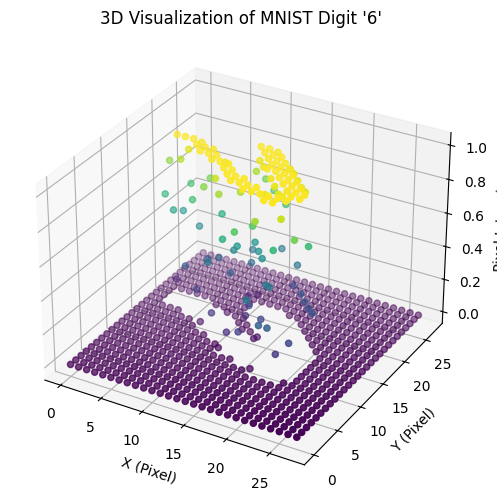

In [27]:
plt.show()